# Megatutorial 1: Explorative Datenanalyse

In diesem Megatutorial beschäftigen wir uns mit der explorativen Datenanalyse in Python.

## Szenario

Wir wurden von einer Social-Media-Plattform damit beauftragt, einen Datensatz mit Profildaten auszuwerten. Das Unternehmen hat uns dazu einen Datensatz mit 576 Profilen zusammengestellt. Aus Datenschutzgründen wurden in diesen Profilen alle personenbezogenen Daten entfernt. Dennoch enthalten die Daten eine Menge an Daten, die Rückschluss auf die Art der Profile enthalten. Darunter sind folgende Merkmale:

* **`profile_pic`:** Eine Bool'sche Variable, die aussagt, ob bei dem Profil ein Profilbild enthalten war, oder nicht.
* **`rel_num_numeric_char_username`:** Die Anzahl der nummerischen Zeichen im Usernamen, in relation zur Gesamtlänge des Usernamen.
* **`words_fullname`:** Die Anzahl der Worte im Namensfeld.
* **`rel_num_numeric_char_fullnam`:** Die Anzahl der nummerischen Zeichen im Namen, in relation zur Gesamtlänge des Namen.
* **`name=username`:** Eine Bool'sche Variable, die aussagt, ob Username und Name übereinstimmen.
* **`description_length`:** Die Länge der Bio, die beim betreffenden Profil hinterlegt wurde.
* **`has_external_url`:** Eine Bool'sche Variable, die aussagt, ob beim Profil eine externe URL (z.B., zu einer Webseite) hinterlegt wurde.
* **`is_private`:** Eine Bool'sche Variable, die aussagt, ob das betreffende Profil als privat markiert wurde.
* **`num_posts`:** Die Anzahl der Posts, die von diesem Profil aus gesendet wurden.
* **`num_followers`:** Die Anzahl der Follower dieses Profils.
* **`num_follows`:** Die Anzahl der Personen, der dieses Profil folgt.
* **`is_fake`:** Eine nachträglich eingefügte Target-Variable, die Angibt, ob diese Profil ein Fake-Profil ist, oder nicht.

## Aufgaben

* Lade die Daten in `pandas`.
* Führe eine deskriptive Datenanalyse mit geeigneten, statisches Maßen durch.
* Führe eine deskriptive Datenanalyse mit Hilfe von geeigneten Visualisierungen durch.


Daten in pandas laden


In [3]:
from pandas import read_csv

In [4]:
data = read_csv(
    "../data/fake_profiles.csv",
    sep= ",",
    decimal= ".",
    skiprows= None, #[0,1,10]
    usecols= range (1,13)    #[1,2,3,4,...]
    )

data.head(5)

,profile_pic,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,name=username,description_length,has_external_url,is_private,num_posts,num_followers,num_follows,is_fake
0,yes,0.27,0,0.0,no,53,no,no,32,1000.0,955,no
1,yes,0.00,2,0.0,no,44,no,no,286,2740.0,533,no
2,yes,0.10,2,0.0,no,0,no,yes,13,159.0,98,no
3,yes,0.00,1,0.0,no,82,no,no,679,414.0,651,no
4,yes,0.00,2,0.0,no,0,no,yes,6,151.0,126,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   profile_pic                    576 non-null    object 
 1   rel_num_numeric_char_username  576 non-null    float64
 2   words_fullname                 576 non-null    int64  
 3   rel_num_numeric_char_fullname  576 non-null    float64
 4   name=username                  576 non-null    object 
 5   description_length             576 non-null    int64  
 6   has_external_url               576 non-null    object 
 7   is_private                     576 non-null    object 
 8   num_posts                      576 non-null    int64  
 9   num_followers                  556 non-null    float64
 10  num_follows                    576 non-null    int64  
 11  is_fake                        576 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 5

In [9]:
data.values


array([['yes', 0.27, 0, ..., 1000.0, 955, 'no'],
       ['yes', 0.0, 2, ..., 2740.0, 533, 'no'],
       ['yes', 0.1, 2, ..., 159.0, 98, 'no'],
       ...,
       ['yes', 0.57, 2, ..., 96.0, 339, 'yes'],
       ['yes', 0.57, 1, ..., 57.0, 73, 'yes'],
       ['yes', 0.27, 1, ..., 150.0, 487, 'yes']],
      shape=(576, 12), dtype=object)

In [7]:
data.describe()

,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,description_length,num_posts,num_followers,num_follows
count,576.000000,576.000000,576.000000,576.000000,576.000000,5.560000e+02,576.000000
mean,0.163837,1.460069,0.036094,22.623264,107.489583,8.835909e+04,508.381944
std,0.214096,1.052601,0.125121,37.702987,402.034431,9.262573e+05,917.981239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,3.800000e+01,57.500000
50%,0.000000,1.000000,0.000000,0.000000,9.000000,1.415000e+02,229.500000
75%,0.310000,2.000000,0.000000,34.000000,81.500000,7.285000e+02,589.500000
max,0.920000,12.000000,1.000000,150.000000,7389.000000,1.533854e+07,7500.000000


In [10]:
data

,profile_pic,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,name=username,description_length,has_external_url,is_private,num_posts,num_followers,num_follows,is_fake
0,yes,0.27,0,0.00,no,53,no,no,32,1000.0,955,no
1,yes,0.00,2,0.00,no,44,no,no,286,2740.0,533,no
2,yes,0.10,2,0.00,no,0,no,yes,13,159.0,98,no
3,yes,0.00,1,0.00,no,82,no,no,679,414.0,651,no
4,yes,0.00,2,0.00,no,0,no,yes,6,151.0,126,no
...,...,...,...,...,...,...,...,...,...,...,...,...
571,yes,0.55,1,0.44,no,0,no,no,33,NaN,596,yes
572,yes,0.38,1,0.33,no,21,no,no,44,66.0,75,yes
573,yes,0.57,2,0.00,no,0,no,no,4,96.0,339,yes
574,yes,0.57,1,0.00,no,11,no,no,0,57.0,73,yes


In [12]:
data["description_length"].mean() #spalte oder series object gescliced (.info(), .describe() oder ander anhängen)

np.float64(22.62326388888889)

In [13]:
data["description_length"].std()

np.float64(37.70298680969428)

In [14]:
data["description_length"].median()

np.float64(0.0)

In [20]:
data.select_dtypes(include="number").corr() #geht auch "exclude=number/ .describe eig sinnlos, weil des andre schon deskripitv ist

,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,description_length,num_posts,num_followers,num_follows
rel_num_numeric_char_username,1.000000,-0.225472,0.408567,-0.321170,-0.157442,-0.063386,-0.172413
words_fullname,-0.225472,1.000000,-0.094348,0.272522,0.073350,0.033532,0.094855
rel_num_numeric_char_fullname,0.408567,-0.094348,1.000000,-0.117521,-0.057716,-0.027388,-0.067971
description_length,-0.321170,0.272522,-0.117521,1.000000,0.144824,0.006369,0.226561
num_posts,-0.157442,0.073350,-0.057716,0.144824,1.000000,0.325895,0.098225
num_followers,-0.063386,0.033532,-0.027388,0.006369,0.325895,1.000000,-0.011009
num_follows,-0.172413,0.094855,-0.067971,0.226561,0.098225,-0.011009,1.000000


In [23]:
data.select_dtypes(exclude="number")

,profile_pic,name=username,has_external_url,is_private,is_fake
0,yes,no,no,no,no
1,yes,no,no,no,no
2,yes,no,no,yes,no
3,yes,no,no,no,no
4,yes,no,no,yes,no
...,...,...,...,...,...
571,yes,no,no,no,yes
572,yes,no,no,no,yes
573,yes,no,no,no,yes
574,yes,no,no,no,yes


In [24]:
data["profile_pic"].mode()

0    yes
Name: profile_pic, dtype: object

In [25]:
data["profile_pic"].value_counts()

profile_pic
yes    404
no     172
Name: count, dtype: int64

In [ ]:
data.describe().info() #grad nd sehr wertvoll


,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,description_length,num_posts,num_followers,num_follows
count,576.000000,576.000000,576.000000,576.000000,576.000000,5.560000e+02,576.000000
mean,0.163837,1.460069,0.036094,22.623264,107.489583,8.835909e+04,508.381944
std,0.214096,1.052601,0.125121,37.702987,402.034431,9.262573e+05,917.981239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,3.800000e+01,57.500000
50%,0.000000,1.000000,0.000000,0.000000,9.000000,1.415000e+02,229.500000
75%,0.310000,2.000000,0.000000,34.000000,81.500000,7.285000e+02,589.500000
max,0.920000,12.000000,1.000000,150.000000,7389.000000,1.533854e+07,7500.000000


In [ ]:
data.corr() #korrelation berechnen von 2 spalten

In [1]:
! echo hallo welt

hallo welt


## Daten Visualisierung mit Pandas

Matplotlib is building the font cache; this may take a moment.


<Axes: >

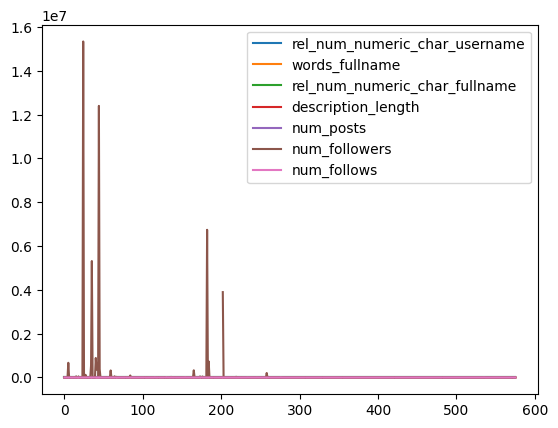

In [26]:
data.plot()

<Axes: >

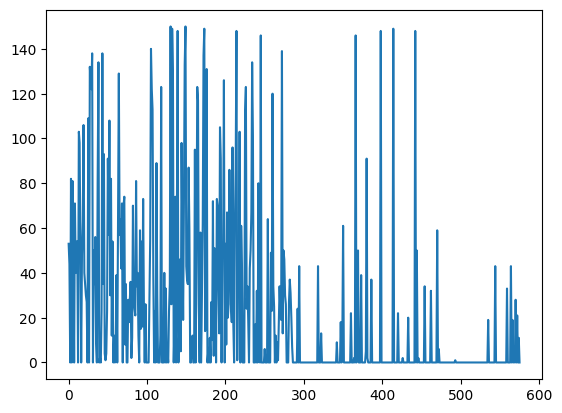

In [27]:
data["description_length"].plot()

<Axes: >

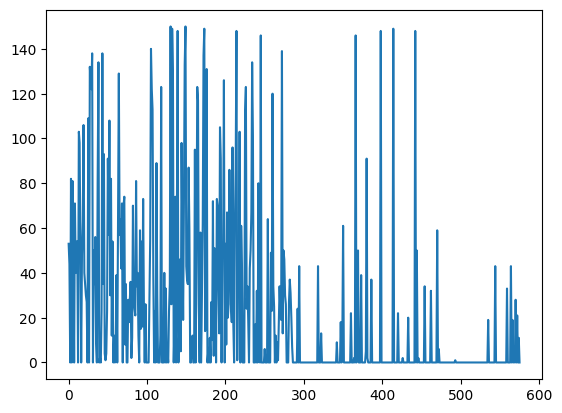

In [28]:
data["description_length"].plot(kind="line")

<Axes: ylabel='Frequency'>

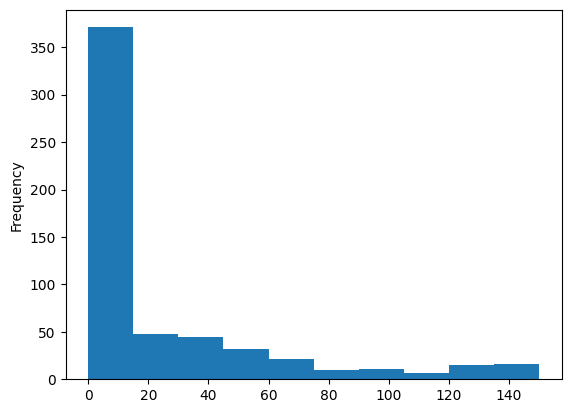

In [29]:
data["description_length"].plot(kind="hist")

<Axes: >

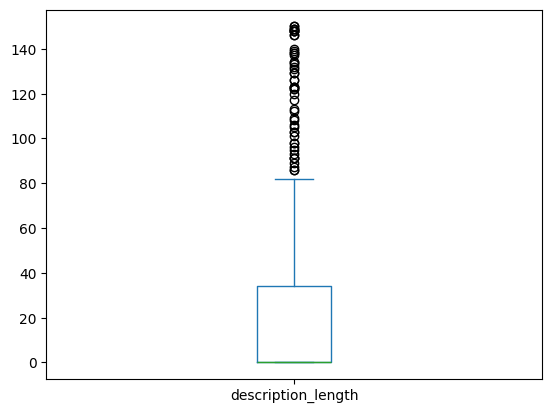

In [30]:
data["description_length"].plot(kind="box")

<Axes: ylabel='Density'>

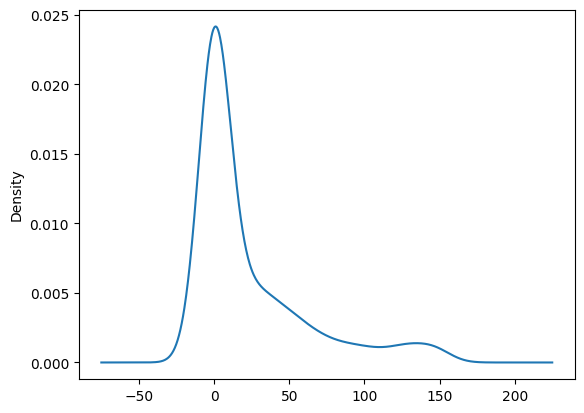

In [31]:
data["description_length"].plot(kind="kde")

<Axes: >

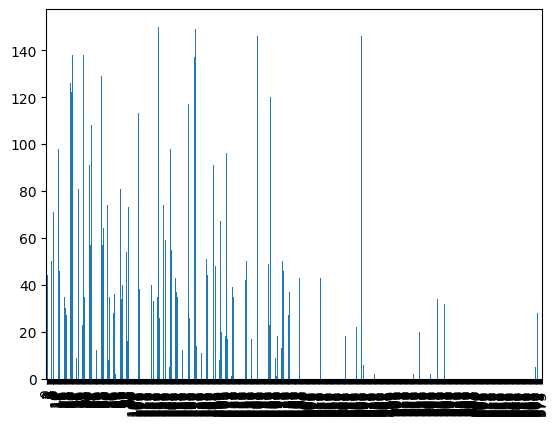

In [32]:
data["description_length"].plot(kind="bar")

<Axes: ylabel='description_length'>

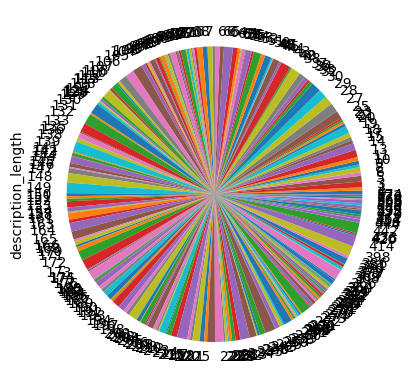

In [33]:
data["description_length"].plot(kind="pie")

<Axes: xlabel='profile_pic'>

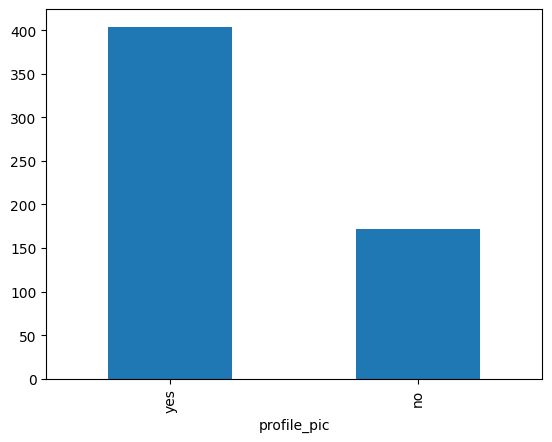

In [35]:
data["profile_pic"].value_counts().plot(kind="bar")

<Axes: title={'center': 'Profiles with profile pictures'}, xlabel='Has Profile Picture', ylabel='Number of profiles'>

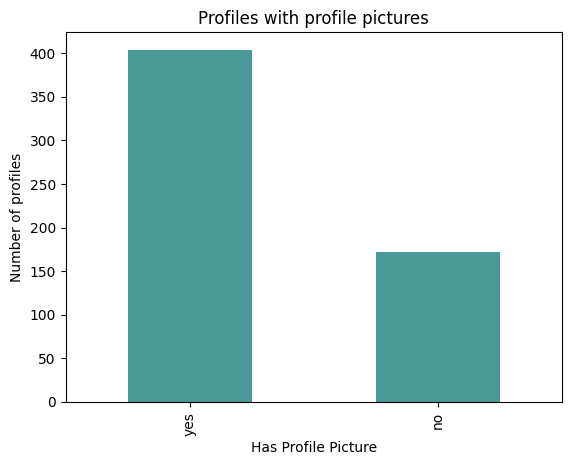

In [ ]:
data["profile_pic"].value_counts().plot(
    kind="bar",
    title="Profiles with profile pictures",
    xlabel="Has Profile Picture",
    ylabel="Number of profiles",
    color="#499996"

    ) #cat is gut in grafiken stylen4

## sonstige praktische Plots

In [50]:
from seaborn import heatmap, clustermap, pairplot

<Axes: >

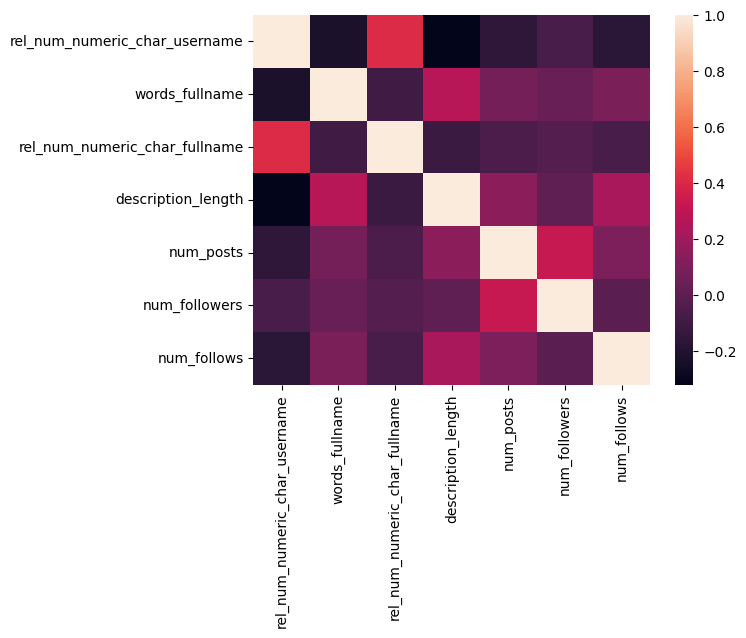

In [46]:
heatmap(
    data.select_dtypes(include="number").corr()
)

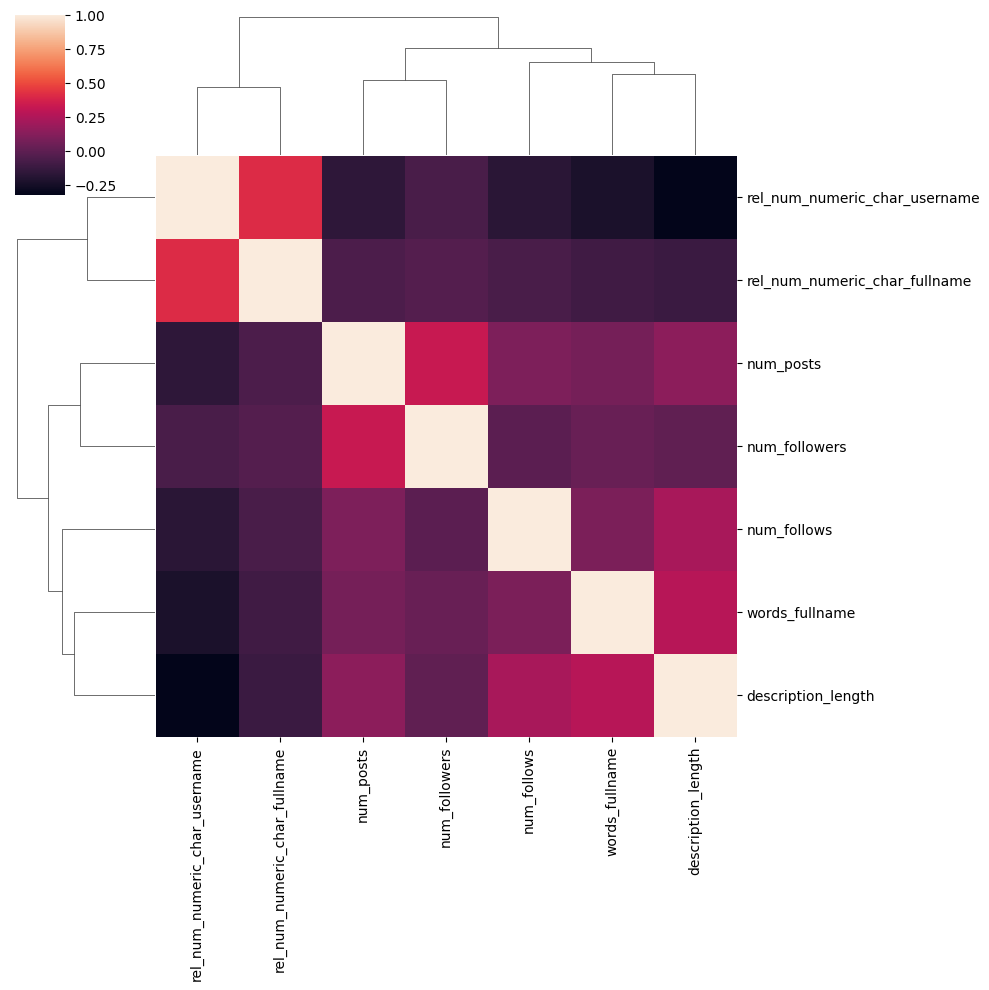

In [49]:
clustermap(
    data.select_dtypes(include="number").corr()

)

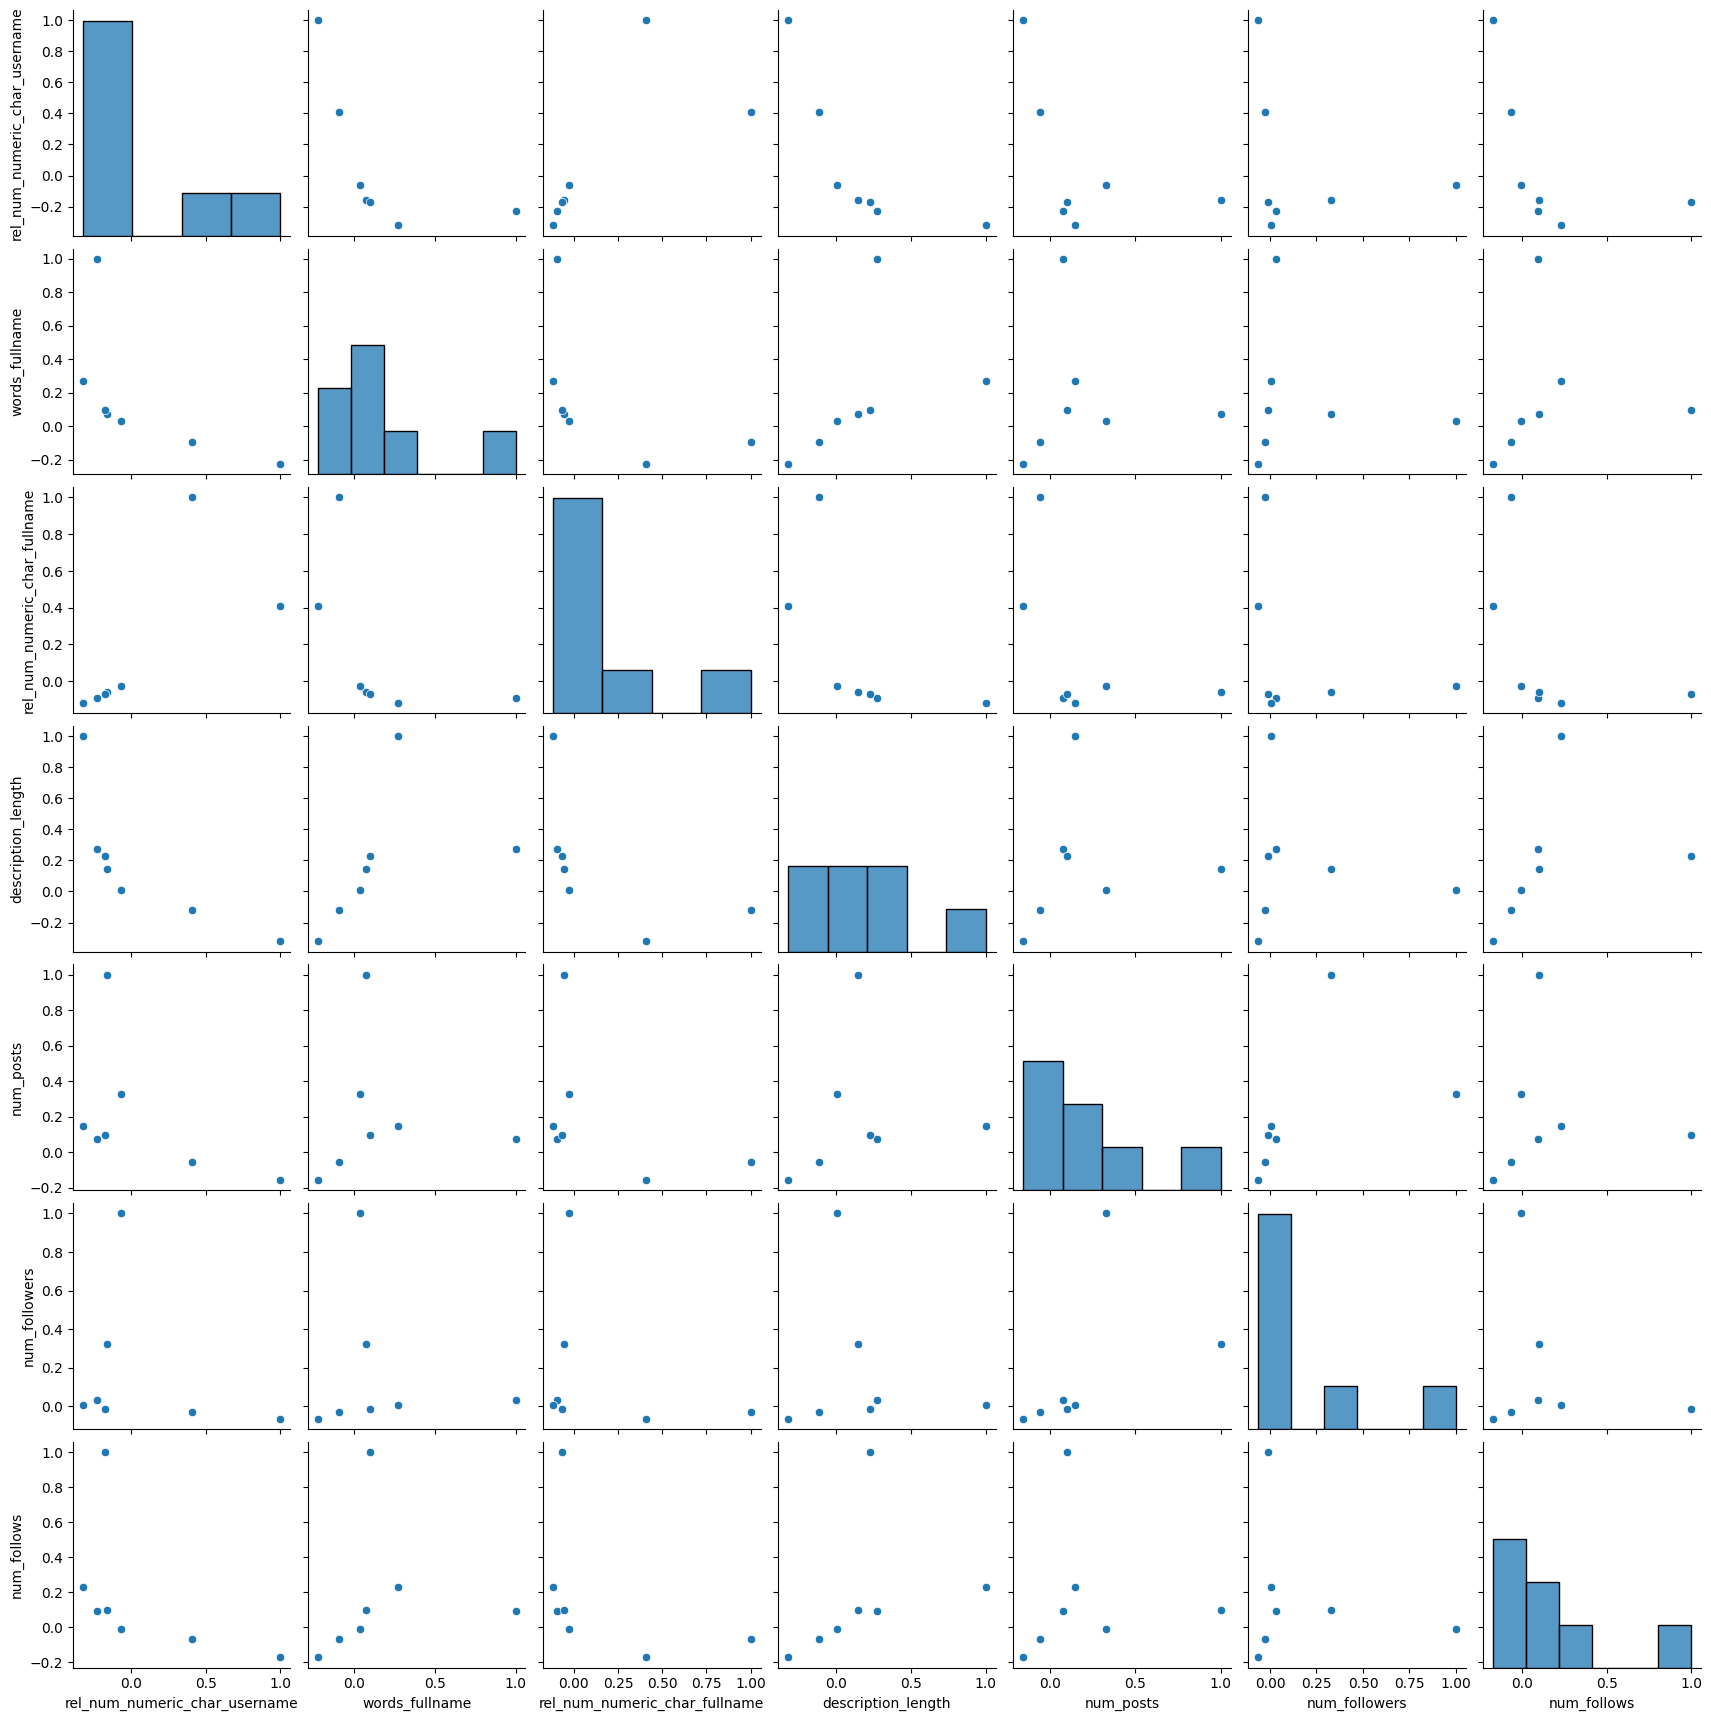

In [51]:
pairplot(
    data.select_dtypes(include="number").corr()
)


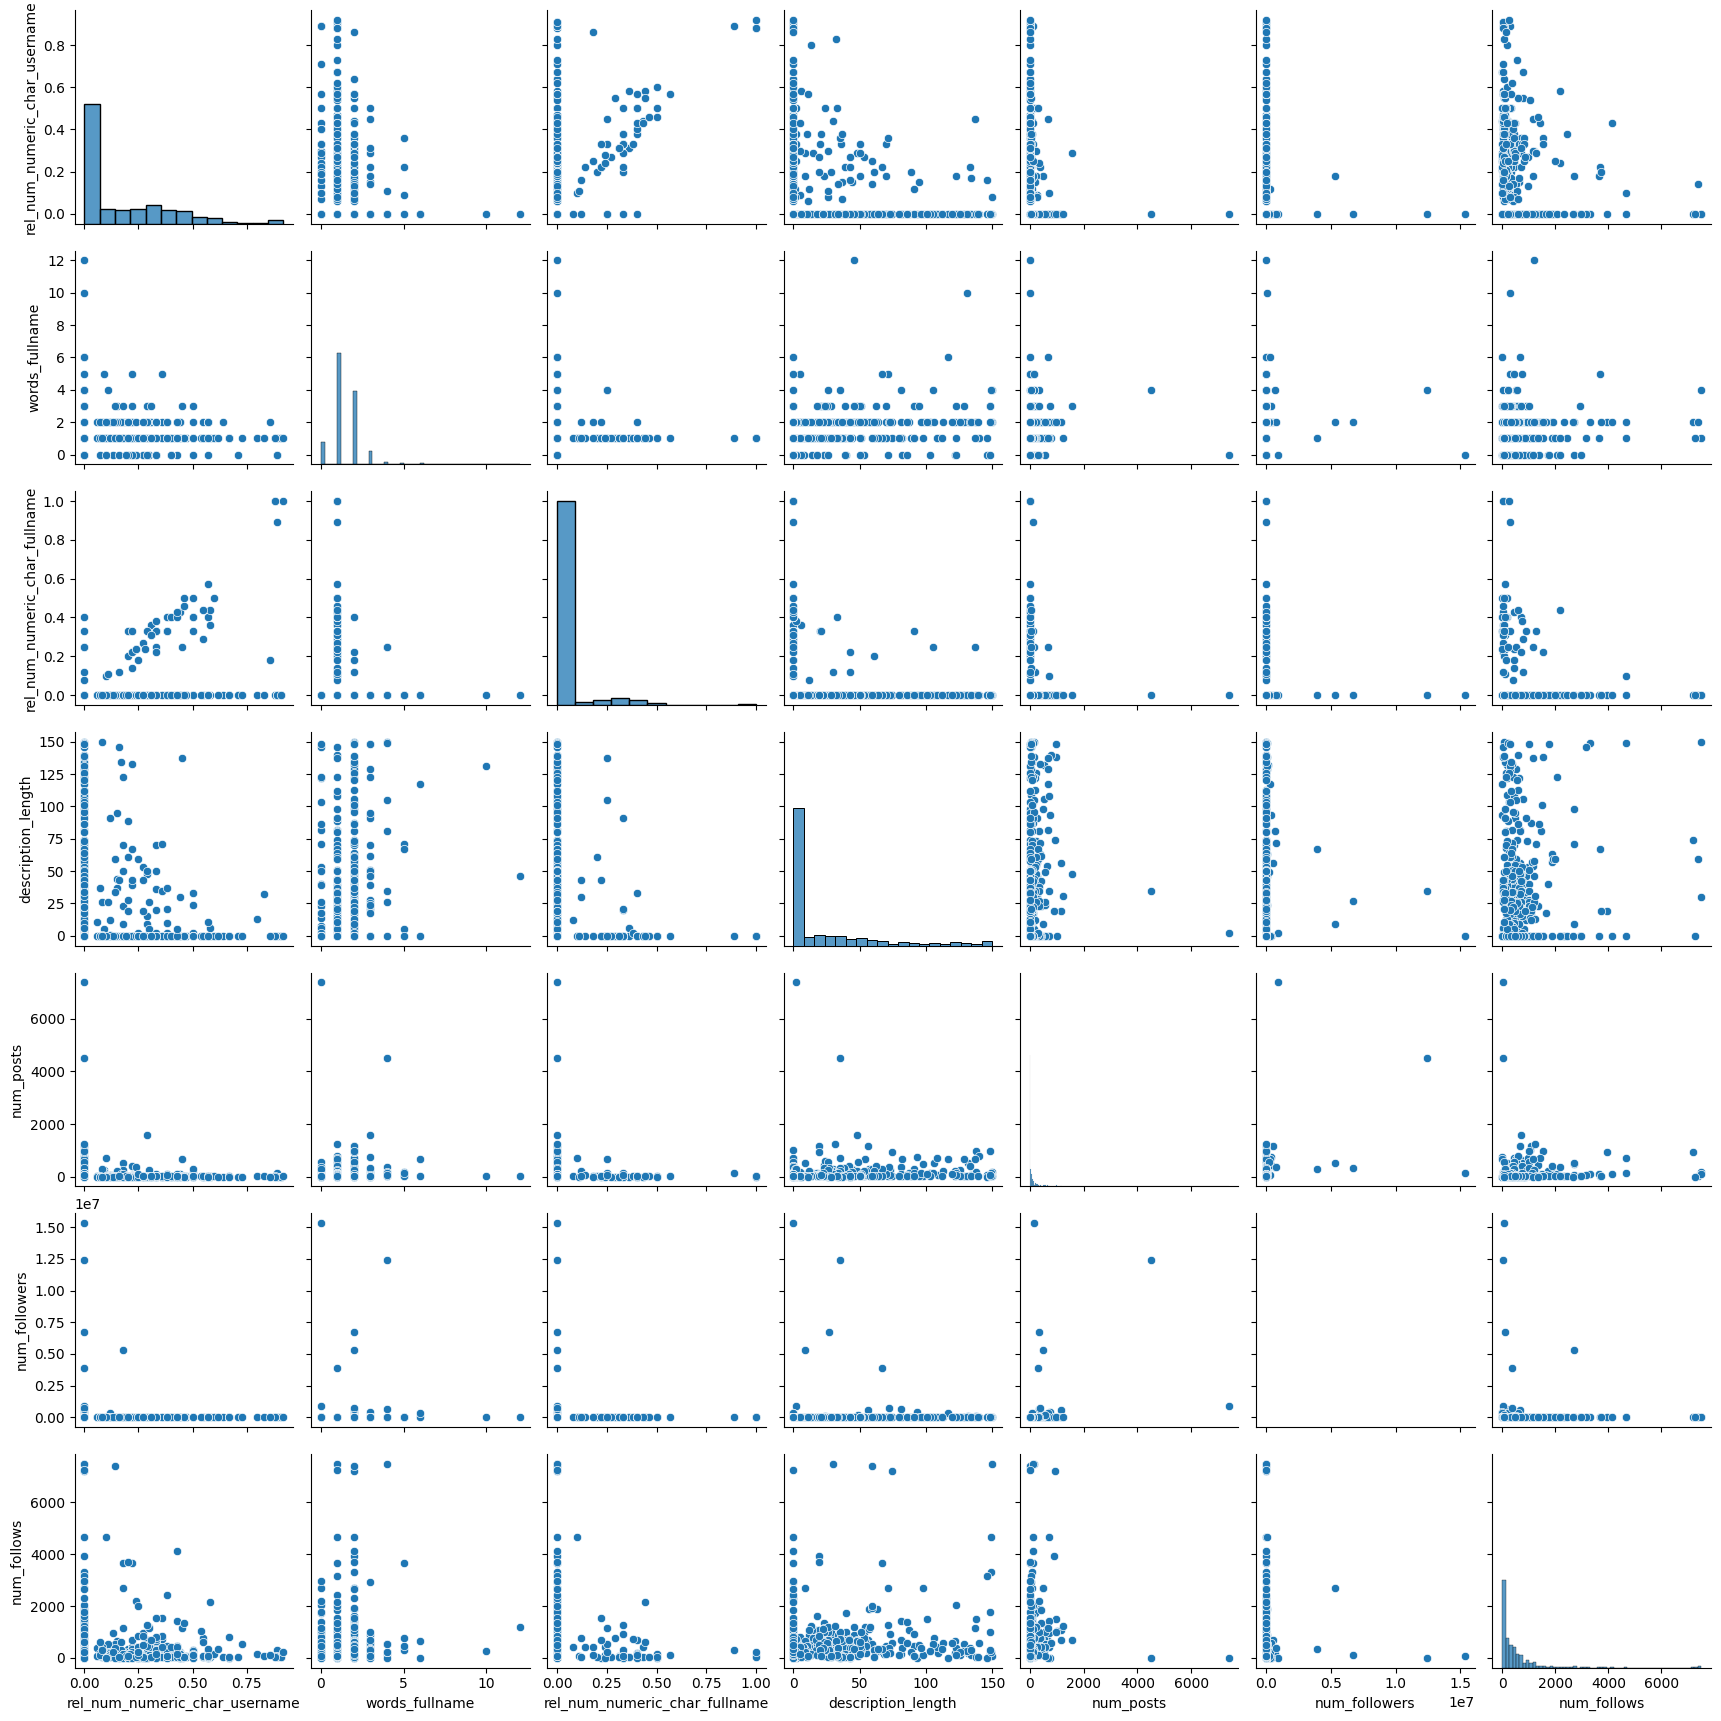

In [52]:
pairplot(
    data
)

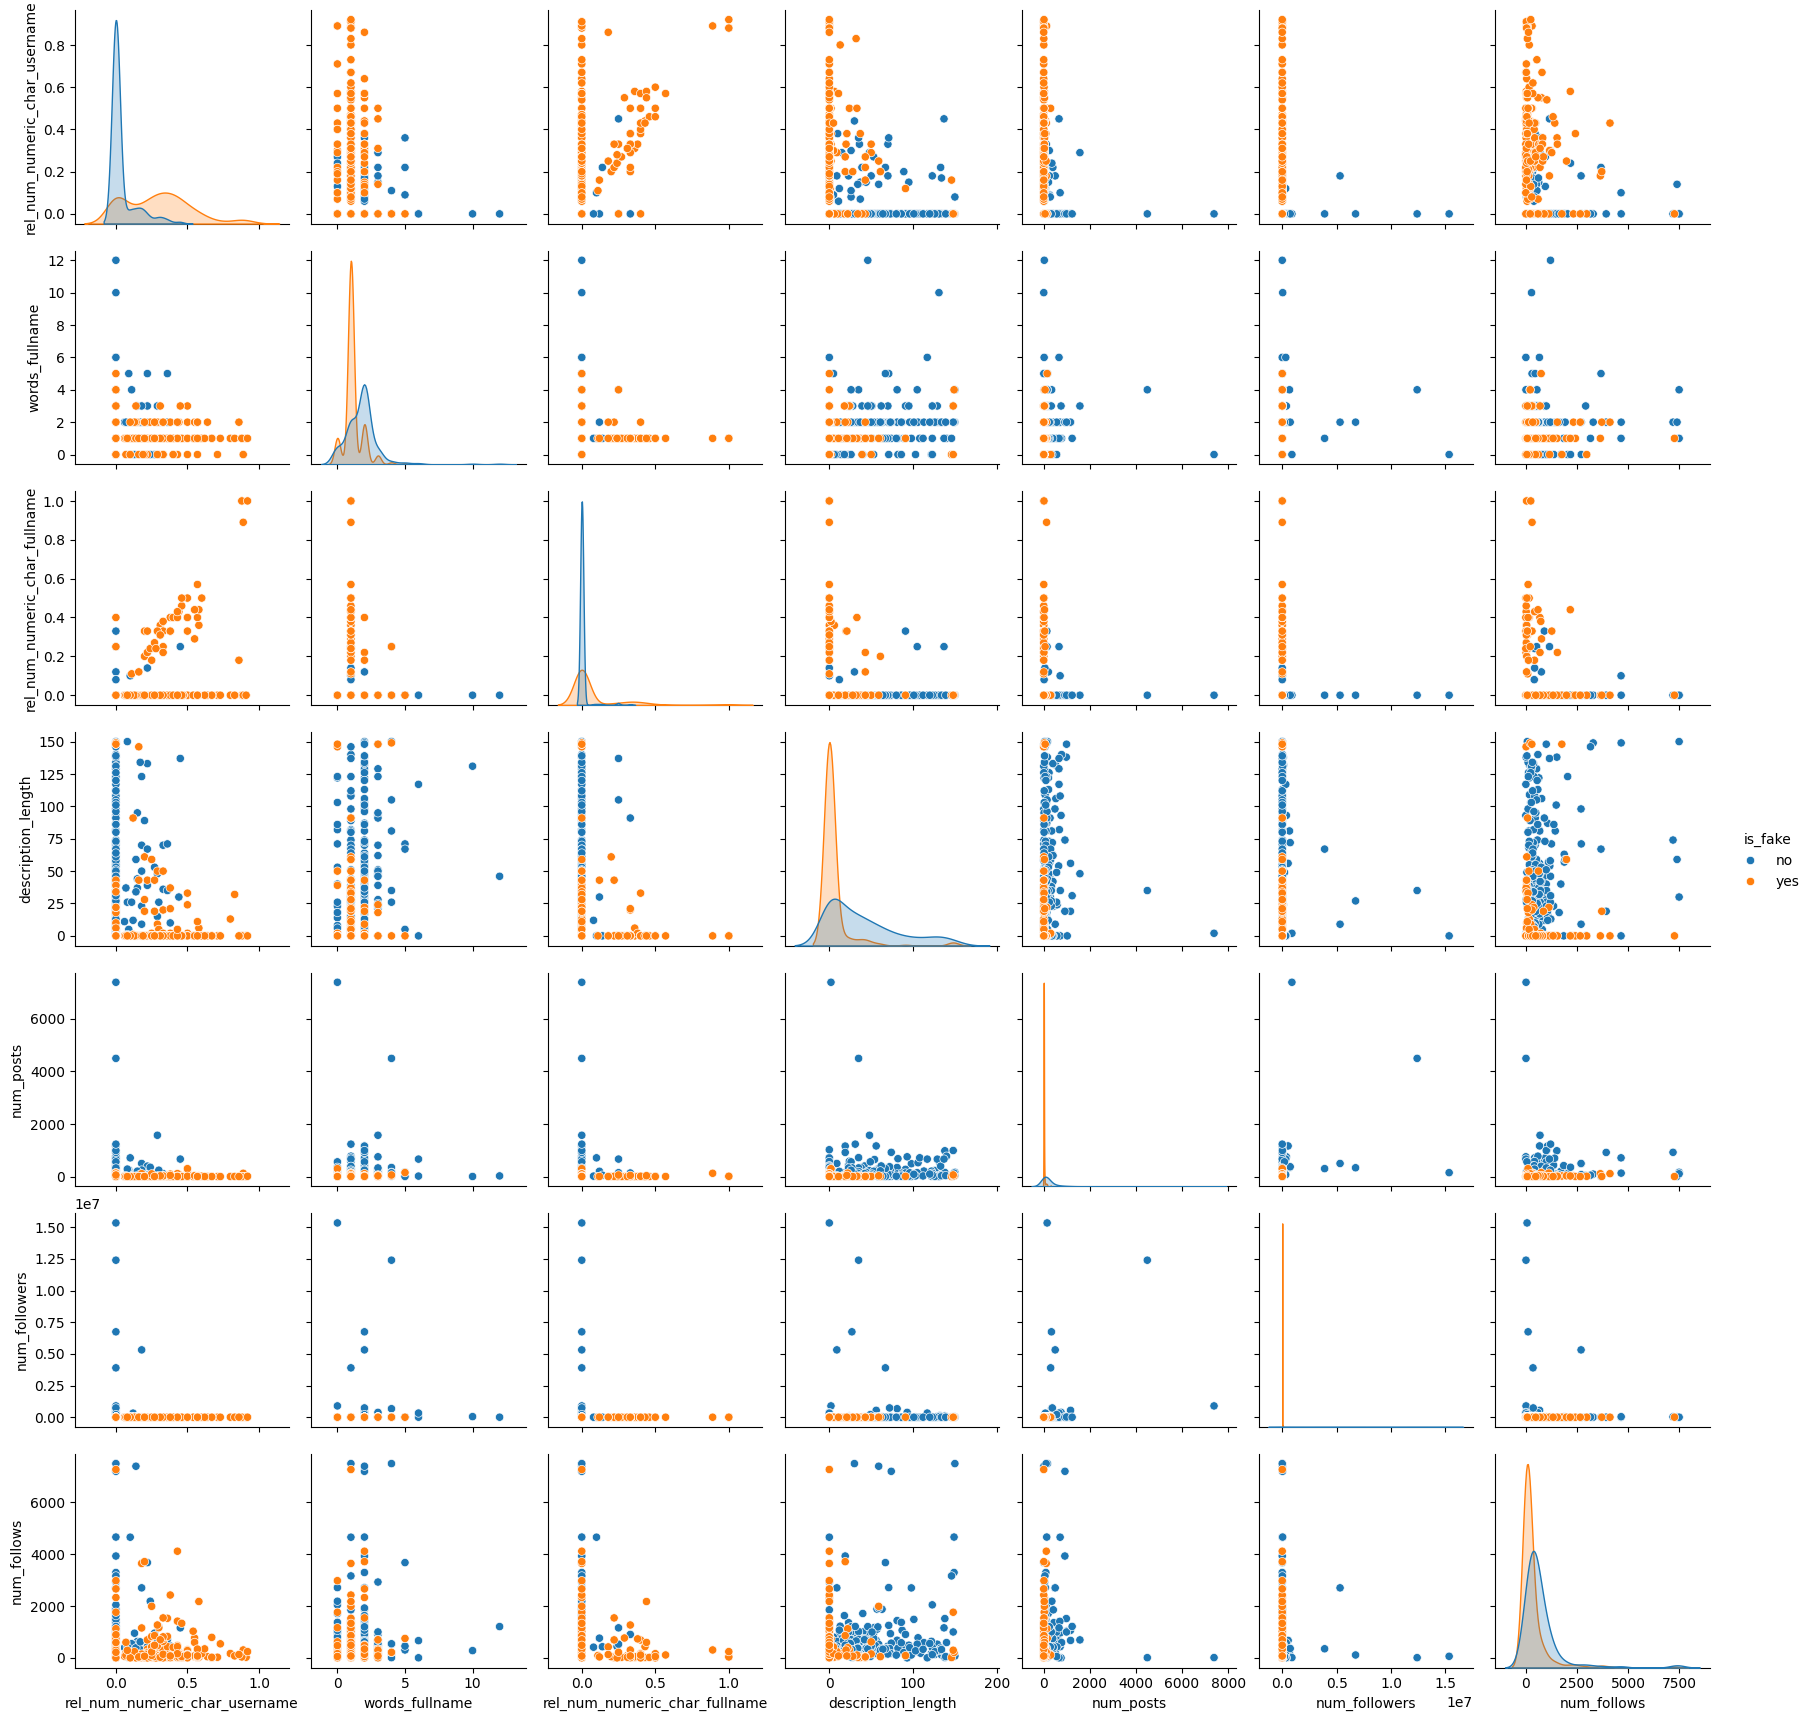

In [53]:
pairplot(
    data, hue="is_fake"
)